In [190]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from skimage.io import imread, imshow
from skimage.measure import find_contours
from pydicom import dcmread
import nibabel as nib
import pyvista as pv
from IPython.display import HTML
import joblib

In [124]:
def cycle_plot(imgs, delay=400, axis=0, marker=None):
    if axis != 0:
        imgs = np.moveaxis(imgs, axis, 0)

    fig, ax = plt.subplots()

    frames = []
    for i, img in enumerate(imgs):
        content = []

        frame = ax.imshow(img, animated=True, cmap="Greys_r")
        content.append(frame)

        title = ax.text(
            0.5,
            1.02,
            str(i),
            ha="center",
            va="bottom",
            transform=ax.transAxes,
            fontsize="large",
        )

        content.append(title)

        if marker:
            m = ax.scatter(*marker, c="red")
            content.append(frame)

        frames.append(content)

    plt.close()
    ani = animation.ArtistAnimation(fig, frames, interval=delay, blit=True)
    return HTML(ani.to_html5_video())

In [145]:
basepath = "/mnt/materials/SIRF/MathPlusBerlin/DATA/ACDC-Daten/DCM"
patient = "patient002"
img_path = os.path.join(basepath, patient, "image.nii.gz")
label_path = os.path.join(basepath, patient, "label.nii.gz")

In [161]:
img = nib.load(img_path).get_fdata()
label = nib.load(label_path).get_fdata()

In [162]:
label.shape

(232, 256, 10, 1, 30, 1)

/opt/conda/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


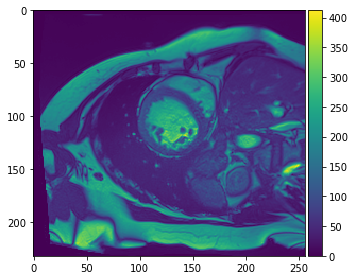

In [148]:
imshow(img.get_fdata()[:, :, 2, 0, 0, 0])

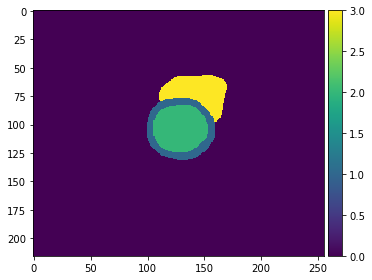

In [33]:
imshow(label.get_fdata()[:, :, 2, 0, 0, 0])

In [121]:
slc = label.get_fdata()[:, :, 1, 0, 3, 0]

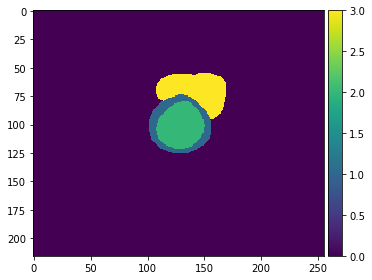

In [122]:
imshow(slc)

### Try with pyvista

For now we decided to use something else since this is for 3d data and plotting crashes the kernel

In [35]:
coords = np.stack(np.nonzero(slc)).astype(float)
coords = np.concatenate((coords, np.zeros((1, coords.shape[1]))))

In [36]:
point_cloud = pv.PolyData(coords.T)

In [37]:
# point_cloud.plot(eye_dome_lighting=True)

### Try scikit image

In [104]:
contours = find_contours(slc == 2)

In [105]:
len(contours)

1

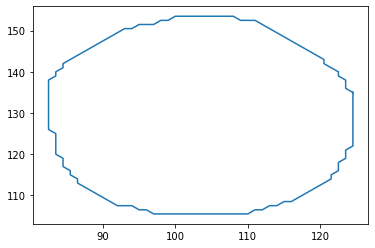

In [106]:
for contour in contours:
    plt.plot(*contour.T)

In [91]:
contours[0].shape

(231, 2)

### Implementation for all slices and time points

In [171]:
def load_labels(patient, basepath="/mnt/materials/SIRF/MathPlusBerlin/DATA/ACDC-Daten/DCM"):
    label_path = os.path.join(basepath, patient, "label.nii.gz")
    return nib.load(label_path).get_fdata()

In [180]:
def extract_contours(label):
    n_slices = label.shape[2]
    n_times = label.shape[4]

    contours = []
    for i in range(n_times):
        cnts_time = []
        for j in range(n_slices):
            cnts_slice = find_contours(label[:, :, j, 0, i, 0] == 2)
            if len(cnts_slice) == 1:
                cnts_time.append(cnts_slice[0])
            elif len(cnts_slice) > 1:
                raise RuntimeError("")
        contours.append(cnts_time)
    
    return contours

In [181]:
patients = [f"patient{i:03d}" for i in range(1, 16)]
contours = {}
for patient in patients:
    print(patient)
    label = load_labels(patient)
    contours[patient] = extract_contours(label)

patient001
patient002
patient003
patient004
patient005
patient006
patient007
patient008
patient009
patient010
patient011
patient012
patient013
patient014
patient015


In [189]:
joblib.dump(

<module 'joblib' from '/opt/conda/lib/python3.9/site-packages/joblib/__init__.py'>